In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# ある賭けの研究

ある額の金を用意し、コインを投げて
* 表が出たら50％を追加でもらえる（×1.5）
* 裏が出たら40％を没収される（×0.6）

という賭けを考える。

この二つの数字には
* 算術平均 $ \frac{1.5 + 0.6}{2} = 1.05$ は 1 より大きく、
* 幾何平均 $ \sqrt{1.5 * 0.6} = 0.948...$ は 1 より小さい

という性質がある。
このことが、以下で述べる不思議な現象を引き起こすことになる。

最初、あなたは100円持っているとする。この賭けを何度か繰り返すことを考えてみよう。このとき、毎回いくらの金を賭けるかについてはいろいろな戦略が考えられる。
* 戦略１「同額」： 毎回同じ額を賭ける（足りなければ借金をする）。
* 戦略２「全賭け」： 毎回、いま持っている金をすべて賭ける。
* 戦略３「上限つき同額」： 毎回同じ額を賭ける（足りなければ借金をする）が、所持金がある額を上回ったら賭けをやめる（その後は0円を賭ける）。
* 戦略４「上限つき全賭け」： 毎回、いま持っている金をすべて賭けるが、所持金がある額を上回ったら賭けをやめる（その後は0円を賭ける）。

これらの戦略をとったとき、あなたの所持金はどのように変化するだろうか。あなたのお金がどれくらいの確率でいくらになるのか、確率分布を見ていこう。

## 戦略１「同額」

毎回の賭け金が同額の時、一回の賭けのあとには同じ確率で所持金は以下のようになる。

60, 150

期待値は $ 100 * 1.05 = 105 $ 円となる。

毎回同じ額を賭けて何度か繰り返すと、所持金の可能性は以下の数列のようになる（すべての額は当確率で発生する）。

2回: 20,110,110,200

3回: -20,70,70,70,160,160,160,250

4回: -60,30,30,30,30,120,120,120,120,120,120,210,210,210,210,300

では、賭けを 100 回繰り返すとどうなるだろうか。それを示したのが次のグラフである。

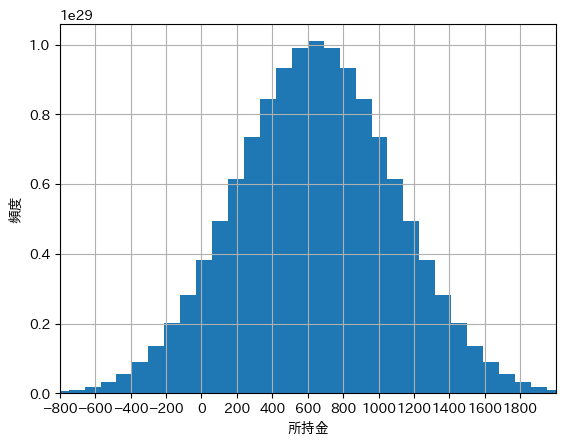

期待値は 600.0 です。
元手を上回る確率は 86.43734879630826 ％ です。


In [237]:
def douogaku(c0, n, bins, xlim, xticks):
    """
    c0   : 最初の所持金
    n    : 賭けの回数
    bins : ヒストグラムのビンの数
    xlim : x の表示範囲
    xticks : x の目盛りの範囲とステップ
    """
    x = np.empty(n + 1)
    y = np.empty(n + 1)
    for i in range(n + 1):
        x[i] = c0 + (c0 * 1.5 - c0) * i + (c0 * 0.6 - c0) * (n - i)
        y[i] = math.comb(n, i)
        # print(f"{x[i]}, {y[i]}")
    plt.hist(x, weights=y, bins=bins)
    plt.xlim(xlim)
    plt.xticks(np.arange(*xticks))
    plt.grid()
    plt.xlabel("所持金")
    plt.ylabel("頻度")
    plt.show()

    weighted_avg = np.average(x, weights=y)
    print(f'期待値は {weighted_avg} です。')

    # 元手を上回る確率の計算
    freq_low = freq_hi = 0
    for i, val in enumerate(x):
        if val < c0:
            freq_low += y[i]
        else:
            freq_hi += y[i]
    print(f'元手を上回る確率は {freq_hi / (freq_hi + freq_low) * 100} ％ です。')
    
douogaku(100, 100, 100, [-800, 2000], [-800, 2000, 200])

特徴をまとめると次のようになる。
* 最終的な所持金の期待値は $  100 * (1 + 0.05 * 100) = 600 $ 円。
* もっとも頻度の多い所持金（最頻値）も同じ 600 円である。
* 元手を上回る確率は 86%。
* 勝ち続けると所持金は 5100 円に、負け続けると -3900 円になる。
* マイナス（借金）になることもある。

つまり、儲かる（元手を上回る）可能性は高いが、その額はさほど大きくない。安全だが一攫千金は狙えないような賭け方になっている。また、借金を負う可能性があることも要注意である。

「同額」戦略とは結局のところ、毎回半々の確率で 50 円増えるか、40 円減るかという賭けである。この結果として現れる分布の形は二項分布と呼ばれるものである。二項分布については次のような性質が知られている。
1. 所持金の最頻値も期待値と同じである。また、所持金がこの期待値＝最頻値よりも小さくなる確率と、大きくなる確率は等しい。
2. 所持金の期待値は $ 100 * (1 + (\frac{1.5 + 0.6}{2} - 1) * n) $ となる。1.5 と 0.6 の算術平均が 1 よりも大きいため、この値は賭けの回数に**比例して**大きくなっていく。
3. この分布の標準偏差（つまり分布の幅）は $ \sqrt{n} $ に比例する。

つまり、$n$ が大きくなるにつれて分布の中心は $n$ に比例して離れていくのに、分布の幅は $ \sqrt{n} $ に比例してしか増えていかない。

実際、賭けの回数を 1000 回にしたときの分布が以下の図である。この図で、x=0 の位置と分布の頭（＝期待値）の位置は上の図と変わらない。これを見比べると、分布の幅がより細くなっていることが分かる。

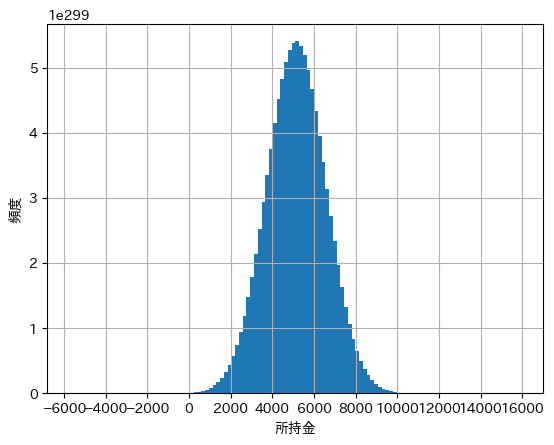

期待値は 5100.0 です。
元手を上回る確率は 99.977883988695 ％ です。


In [230]:
douogaku(100, 1000, 500, [-6800, 17000], [-6000, 18000, 2000])

1000 回繰り返した場合、元手を上回る確率は 99.98% となり、ほぼ確実に利益を得ることが分かる。損をしたり、さらには所持金がマイナス（借金）になる確率はほぼゼロに近くなる。

## 戦略２「全賭け」

同様に「全賭け」戦略を見ていこう。
毎回すべての所持金を賭ける場合、何度か賭けをおこなったあとの所持金は以下のようになる。

1回: 60, 150

2回: 36, 90, 90, 225

3回: 21.6, 54, 54, 54, 135, 135, 135, 337.5

4回: 12.96, 32.4, 32.4, 32.4, 32.4, 81, 81, 81, 81, 81, 81, 202.5, 202.5, 202.5, 202.5, 506.25

この戦略で 10 回賭けを繰り返した場合、その結果は以下のようになる。

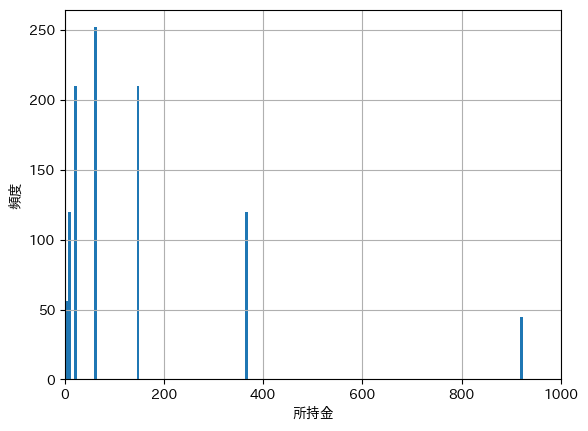

期待値は 162.88946267774412 です。
元手を上回る確率は 37.6953125 ％ です。


In [172]:
c0 = 100 # 最初の所持金
n = 10 # 賭けの回数

x = np.empty(n + 1)
y = np.empty(n + 1)
for i in range(n + 1):
    x[i] = c0 * (1.5 ** i) * (0.6 ** (n - i))
    y[i] = math.comb(n, i)
    # print(f"{x[i]}, {y[i]}")
plt.hist(x, weights=y, bins=1000)
plt.xlim(0, 1000)
plt.grid()
plt.xlabel("所持金")
plt.ylabel("頻度")
plt.show()

weighted_avg = np.average(x, weights=y)
print(f'期待値は {weighted_avg} です。')

# 元手を上回る確率の計算
freq_low = freq_hi = 0
for i, val in enumerate(x):
    if val < c0:
        freq_low += y[i]
    else:
        freq_hi += y[i]
print(f'元手を上回る確率は {freq_hi / (freq_hi + freq_low) * 100} ％ です。')

この結果をまとめると以下のようになる。
* 最終的な所持金の期待値は $ 100 * 1.05^{10} = 163 $ 円。
* 最頻値はたった $ 100 * (\sqrt{1.5 * 0.6})^{10} = 59 $ 円。
* 元手を上回る確率は 38%。
* 勝ち続けると所持金は 5767 円に、負け続けると 0.6 円になる。
* マイナス（借金）になることはない。

この「全賭け」戦略は次のような性質を持つ。
賭けの回数を $ n $ として、
* 所持金の期待値は $ 100 * 1.05^n $ となる。1.5 と 0.6 の算術平均が 1 よりも大きいため、この値は賭けを繰り返すにつれて**指数関数的に大きくなっていく**。
* 一方で、所持金の最頻値は $ 100 * (\sqrt{1.5 * 0.6})^n $ となる。1.5 と 0.6 の幾何平均が 1 よりも小さいため、これは賭けを繰り返すにつれて**指数関数的に減少していく**。また、所持金がこの最頻値よりも小さくなる確率と、大きくなる確率は等しい。

つまりこの戦略では、高額となるわずかな確率のために期待値が吊り上げられているが、儲かる（元手を上回る）可能性は低い。期待値だけはプラスの「宝くじ」のような賭けになっているということである。

この性質は賭けの回数を増やすにつれてますます顕著になっていく。以下のグラフは $ n = 100 $ としたときのものである（x軸は対数表示になっている）。

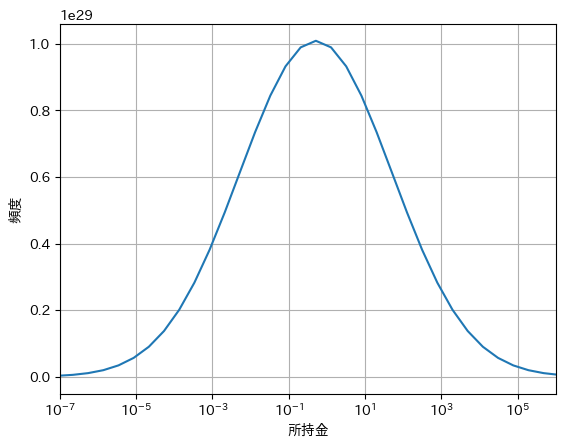

期待値は 13150.12578463033 です。
元手を上回る確率は 13.562651203691736 ％ です。


In [173]:
n = 100 # 賭けの回数
x = np.empty(n + 1)
y = np.empty(n + 1)
for i in range(n + 1):
    x[i] = 100 * (1.5 ** i) * (0.6 ** (n - i))
    y[i] = math.comb(n, i)
    # print(f"{x[i]}, {y[i]}")
plt.plot(x, y)
plt.xscale("log")
plt.xlim(0.0000001, 1000000)
plt.grid()
plt.xlabel("所持金")
plt.ylabel("頻度")
plt.show()

weighted_avg = np.average(x, weights=y)
print(f'期待値は {weighted_avg} です。')

# 元手を上回る確率の計算
freq_low = freq_hi = 0
for i, val in enumerate(x):
    if val < c0:
        freq_low += y[i]
    else:
        freq_hi += y[i]
print(f'元手を上回る確率は {freq_hi / (freq_hi + freq_low) * 100} ％ です。')

元手を上回る確率はたったの 14 ％である。いくら期待値が高くても、この戦略ではほぼ金を失うことになる。


## 戦略３「上限つき同額」

３番目の戦略では、所持金が 150 円を下回っている限り同額をかけ、 150 円を上回ったら賭けをストップすることとする。
何度か賭けをおこなったあとの所持金は以下のようになる。ここで、リストのすべての数を同確率とするため、賭けをストップした場合はその後 0 円を賭け続けたという扱いにする。

1回: 60, 150

2回: 20,110,150,150

3回: -20,70,70,150,150,150,150,160

4回: -60,30,30,120,30,120,150,150,150,150,150,150,150,150,160,160

この戦略で賭けを100回繰り返した場合、その結果は以下のようになる。

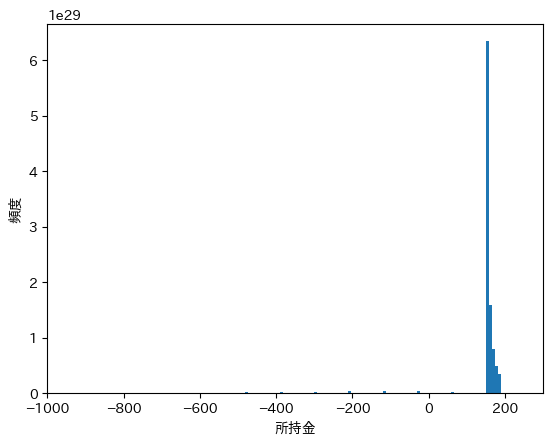

平均は 146.09775142661104 です。
元手を上回る確率は 97.3989087373167 ％ です。


In [232]:
c0 = 100 # 最初の所持金
n = 100 # 賭けの回数
u_lim = 150 # 所持金の上限。これを上回ったら賭けをストップする。

d = {c0:1}
for i in range(n):
    new_d = {}
    for val, freq in d.items():
        if val < u_lim:
            new_d[val - c0 * 0.4] = new_d.get(val - c0 * 0.4, 0) + freq
            new_d[val + c0 * 0.5] = new_d.get(val + c0 * 0.5, 0) + freq
        else:
            new_d[val] = freq * 2
    d = new_d

x, y = zip(*d.items())
plt.hist(x, weights=y, bins=500)
plt.xlim(-1000, 300)
plt.xlabel("所持金")
plt.ylabel("頻度")
plt.show()

weighted_avg = np.average(x, weights=y)
print(f'平均は {weighted_avg} です。')

# 元手を上回る確率の計算
freq_low = freq_hi = 0
for val, freq in d.items():
    if val < c0:
        freq_low += freq
    else:
        freq_hi += freq
print(f'元手を上回る確率は {freq_hi / (freq_hi + freq_low) * 100} ％ です。')

この結果をまとめると次のようになる。
* 97％ の確率で元手の 100 円を上回る。これは上限なしの場合の 86% を上回る。
* 期待値は 146 円、最頻値は 150 円である。これは上限なしの場合の 600 円よりもはるかに小さい。
* わすかな確率だが、マイナス（借金）になることもある。

つまり、手堅く元手を 150 円にすることはできるが、それを大きく上回ることはない。

ちなみに、上限を上げていくと元手を上回る確率は減っていき、「同額」戦略を 100 回繰り返した場合の 86% に近づいていくと同時に、期待値は 600 円へと近づいていく。

## 戦略４「上限つき全賭け」

それでは４番目の戦略を見ていこう。
ここでは所持金が 150 円を下回っている限り所持金全部をかけ、 150 円を上回ったら賭けをストップすることとする。
何度か賭けをおこなったあとの所持金は以下のようになる。ここで、リストのすべての数を同確率とするため、賭けをストップした場合はその後 0 円を賭け続けたという扱いにする。

1回: 60, 150

2回: 36, 90, 150, 150 

3回: 21.6, 54, 54, 135, 150, 150, 150, 150 

4回: 12.96, 32.4, 32.4, 32.4, 81, 81, 81, 150, 150, 150, 150, 150, 150, 150, 150, 202.5

この戦略で賭けを100回繰り返した場合、その結果は以下のようになる。

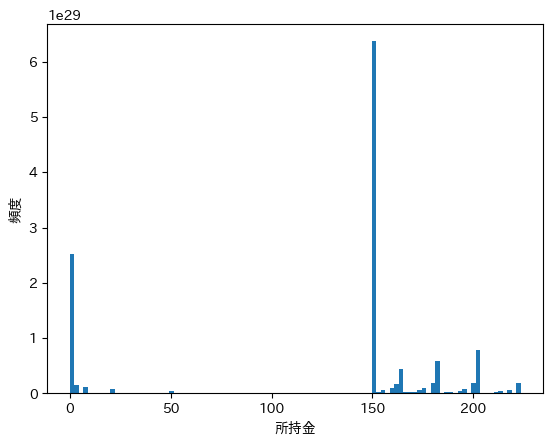

平均は 125.96611712195376 です。
元手を上回る確率は 77.11502881054443 ％ です。


In [175]:
c0 = 100 # 最初の所持金
n = 100 # 賭けの回数
u_lim = 150 # 所持金の上限。これを上回ったら賭けをストップする。

d = {c0:1}
for i in range(n):
    new_d = {}
    for val, freq in d.items():
        if val < u_lim:
            new_d[val * 0.6] = new_d.get(val * 0.6, 0) + freq
            new_d[val * 1.5] = new_d.get(val * 1.5, 0) + freq
        else:
            new_d[val] = freq * 2
    d = new_d

x, y = zip(*d.items())
plt.hist(x, weights=y, bins=100)
plt.xlabel("所持金")
plt.ylabel("頻度")
plt.show()

weighted_avg = np.average(x, weights=y)
print(f'平均は {weighted_avg} です。')

# 元手を上回る確率の計算
freq_low = freq_hi = 0
for val, freq in d.items():
    if val < c0:
        freq_low += freq
    else:
        freq_hi += freq
print(f'元手を上回る確率は {freq_hi / (freq_hi + freq_low) * 100} ％ です。')

結果は次のようになる。
* 77％ の確率で元手の 100 円を上回る。これは上限なしの場合の 14% よりもはるかに高い。
* 期待値は 126 円、最頻値は 150 円である。これは上限なしの場合の期待値 13150 円よりはるかに低い。
* マイナス（借金）になることはない。

つまり、元手を上回る確率は高くなったが、期待できる利益はたったの 50 円から 100 円である。

ところで、上限を150 円といわず、もっと欲張ってみたらどうなるだろうか？　上限を 300 円にして、他の条件は同じだとすると、その結果は次のようになる。

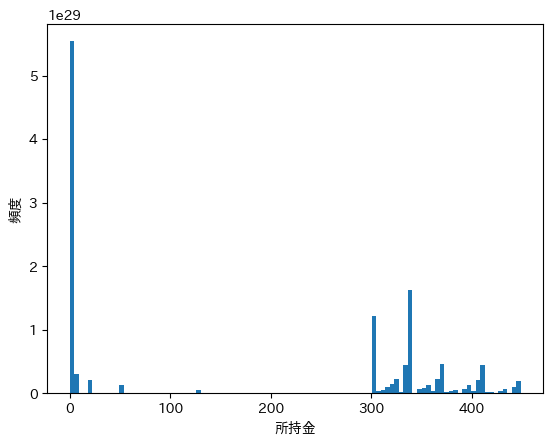

平均は 179.6377914497208 です。
元手を上回る確率は 51.11249587508813 ％ です。


In [176]:
c0 = 100 # 最初の所持金
n = 100 # 賭けの回数
u_lim = 300 # 所持金の上限。これを上回ったら賭けをストップする。

d = {c0:1}
for i in range(n):
    new_d = {}
    for val, freq in d.items():
        if val < u_lim:
            new_d[val * 0.6] = new_d.get(val * 0.6, 0) + freq
            new_d[val * 1.5] = new_d.get(val * 1.5, 0) + freq
        else:
            new_d[val] = freq * 2
    d = new_d

#item_list = sorted(d.items(), key=lambda x:x[0]) # 辞書をソートする    
#x, y = zip(*item_list)

x, y = zip(*d.items())
plt.hist(x, weights=y, bins=100)
plt.xlabel("所持金")
plt.ylabel("頻度")
plt.show()

weighted_avg = np.average(x, weights=y)
print(f'平均は {weighted_avg} です。')

# 元手を上回る確率の計算
freq_low = freq_hi = 0
for val, freq in d.items():
    if val < c0:
        freq_low += freq
    else:
        freq_hi += freq
print(f'元手を上回る確率は {freq_hi / (freq_hi + freq_low) * 100} ％ です。')

期待値は 50 円ほど上がったが、0 円付近になる頻度が増えている。
元手を上回るかどうかは半々で、もはや「高い確率で」利益になるとは言えない結果だ。
ちなみに、もしこの上限をもっと上げていくと、次第に「全賭け」戦略の結果に近づいていくはずだ。
つまり、欲張って上限を上げすぎると、結局「宝くじ」状態へと戻っていく。

## 評価基準と戦略

さて、これまで４つの戦略を見てきた。この賭けにおいて、もっとも「良い」戦略はどのようなものだろうか？

一般的に言えば、損する可能性が少なく、マイナス（借金）になる可能性が少ないかあるいはゼロであり、得をする額率が大きくてその額が大きいことが賭けには期待される。だがそれらのどこに力点を置くかはもちろん人それぞれだろう。一攫千金を狙う人もいれば、できるだけ損をしたくないという人もいるだろう。

例えば、期待値を最大にすることを考えるならば、「全賭け」戦略がもっとも「良い」戦略となる。だが上で見たように、この戦略では賭けの回数を増やせば増やすほど、トータルでプラスになる可能性はとても低くなる。

最頻値を最大にすることにはあまり意味がない。頻度が高い一つの値があるのと、その値がわずかに違ういくつかの値に分かれているのでは、分布として実質的な違いはあまりないからだ。

それでは、所持金が減らない確率を最大にするのはどんな戦略だろうか？　答えは、最初から賭けをしないという戦略である。賭けをしなければ所持金は最初のままで、減らない確率は 100% である。一度でも賭けをする限り、毎回負ける確率はゼロではないから、所持金を減らす確率は必ずプラスになってしまう。

## 目標額、借金あり

もう少し現実的な基準について考えてみよう。
所持金がある目標額以上になる確率を最大にする戦略とはどんなものろうか？
実は、借金ができるかどうかによって、最適な戦略は大きく変わってくる。

利子ゼロで借金がいくらでもできる場合を考えてみよう。
この場合は、次のような戦略によって、**理論的には**所持金をほぼ確実に目標額にすることができる。

前提条件として、最初の所持金は 100 円、目標額を 1000 円としよう。

１回目、あなたは 1700 円の借金をして、所持金と合わせて 1800 円を賭けに賭ける。

賭けに勝てば所持金は 1800 * 1.5 = 2700 円になる。そこから 1700 円の借金を返すと、残りはちょうど 1000 円となり、目標達成である。

もし賭けに負ければ、所持金は 1800 * 0.6 = 1080 円となる。1700 円借りていたので、残りは差し引き 620 円の借金となる。

賭けに負けた場合、あなたはさらに借金をして２回目の賭けに挑む。あなたは新たに 3860 円を借り、まず借金 620 円を返してから、残りの 3240 円を賭ける。

勝てば所持金は 3240 * 1.5 = 4860 円となり、そこから借金 3860 円を返すと 1000 円となり、目標達成である。

負けた場合、所持金は 3240 * 0.6 = 1944 円となり、そこから 3860 円を返すと残りは 1916 円の借金となる。

このようにして、賭けに負け続けた場合でも、その都度必要な額を借金をすることによって、次に勝ったときに借金も返し、目標額も達成することができる。これを繰り返せば、負け続ける可能性はどんどんゼロに近くなり、目標額を達成する確率は 1 に近づいていく。

これを定式化すると次のようになる。

$ k $ 回賭けに負け続けたあとの所持金を $ c_k $ とする。$ c_0 = 100 $

$ k $ 回目の賭けのあとに新たに借りる金 $ d_k = 2000 - 3c_k $

$ k $ 回目の賭けにも負けた場合の所持金（借金ならマイナス）$ c_{k+1} = 1.8c_k - 800 $

これより、$ d_{k+1} = 1.8d_k + 800 $

さて、この戦略についての良い点と悪い点について紹介しよう。

まず良い点だが、この戦略は勝ち負けの額にはよらない。勝ったときに賭けた金額の一定の割合を得られさえすれば、負けたときにいくら損をしようと、また賭けの期待値がマイナスであろうと、この戦略は有効だ。とにかく同じ賭けが何度でも続けられ、借金さえ可能なら、この戦略はいつでも成り立つ。

次に悪い点だが、現実にはこの戦略は実行できない。読者の中にはこの戦略が、いわゆる「倍賭け法」という賭けの手法に似ていることに気づかれた方もおられるだろう。これは「負けるたびに前に賭けた２倍の金額を賭ける」というもので、勝つまで繰り返して最後に勝てば、それまでの負けをすべて取り戻して（わずかな）利益を得ることができる。なぜこの手法が現実的でないかと言えば、負けるたびに必要な資金の額が指数関数的に増えていくからだ。指数関数を決して甘く見てはいけない。

これを実感するために、上記の条件において必要になる借金がどのように増えていくかを見てみよう。賭けに負け続けた場合の借金の推移は以下のようになる。連続して 10 回負けたあと、あなたがしなければならない借金はほぼ 100 万円になる。

1700, 3860, 7748, 14746, 27344, 50018, 90833, 164299, 196539, 534570, 963026

そして、それだけの借金をしてようやく勝ったとしても、あなたの得られる利益はたったの 900 円なのだ。これでは、現実には借金の利息も払えないだろう。

## 目標額、借金なし

借金することなしに、高い確率で所持金を目標額まで増やせるような戦略はないだろうか。

「同額」戦略では、一定額の賭けを繰り返すとき、回数を増やしていけばいくらでも高い期待値を得られ、借金が残る可能性もゼロになっていくことを見た。とにかく賭けの回数を増やすことが重要なのだ。しかし「同額」戦略だとその過程では借金が必要になる。

賭けの回数を増やすために借金をするのではなく、所持金を小さく分割してはどうだろうか？

最初の所持金 100 円をすべて一回の賭けに賭けるのではなく、小さく分割して賭け、その結果を足し合わせるとどうなるだろうか？例えば 1000 に分割し、0.1 円の賭けを多数おこなって足し合わせるとどうなるだろう？

少し考えてみれば分かることだが、これは「同額」戦略で 1000 回の賭けをおこない、結果の合計を 1000 で割ったものになる。その分布を図に描くと下のようになる。

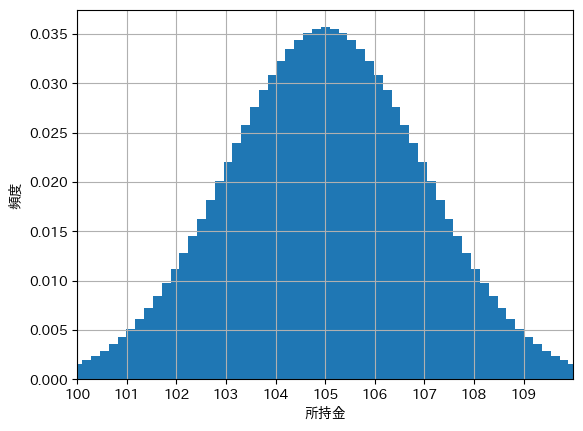

期待値は 105.0 です。
元手を上回る確率は 99.30870168486118 ％ です。


In [66]:
def bunkatsu(c, m):
    """
    c    : 所持金の分布（dict）
    m    : 分割数
    """
    d = {}
    for val, freq in c.items():
        for i in range(m + 1):
            new_val = val * (1 + (0.5 * i - 0.4 * (m - i)) / m) 
            d[new_val] = d.get(new_val, 0) + freq * math.comb(m, i) / (2**m)
    return d # 結果の分布を返す

def display(d, c0, bins, xlim, xticks):
    """
    d    : 所持金の分布（dict）
    c0   : 最初の所持金
    bins : ヒストグラムのビンの数
    xlim : x の表示範囲
    xticks : x の目盛りの範囲とステップ
    """
    x, y = zip(*d.items())
    plt.hist(x, weights=y, bins=bins)
    plt.xlim(xlim)
    plt.xticks(np.arange(*xticks))
    plt.grid()
    plt.xlabel("所持金")
    plt.ylabel("頻度")
    plt.show()

    weighted_avg = np.average(x, weights=y)
    print(f'期待値は {weighted_avg} です。')

    # 元手を上回る確率の計算
    freq_low = freq_hi = 0
    for val, freq in d.items():
        if val < c0:
            freq_low += freq
        else:
            freq_hi += freq
    print(f'元手を上回る確率は {freq_hi / (freq_hi + freq_low) * 100} ％ です。')

#d = bunkatsu({100:1}, 10)
#display(d, 100, 100, [0, 200], [0, 200, 10])

d = bunkatsu({100:1}, 500)
display(d, 100, 505, [100, 110], [100, 110, 1])

「同額」戦略のところで見たように、この分布は二項分布と呼ばれるもので、分割数が増えるにつれて正規分布に近づいていく。
分割しても期待値は 105 のまま変わらないが、標準偏差（ばらつきの度合い）は $ 1 / \sqrt{n} $ に比例して小さくなっていく。

さて、これで高い確率で元手を上回る方法が分かった。それでは、この「小さく分割して賭け、結果を足し合わせる」という手順を１ステップとして、得られた所持金すべてを次のステップにつぎ込むというやり方で、このステップを繰り返すとどうなるだろうか？

10 ステップ繰り返した結果は以下のようになる。

In [ ]:
def rearrange(d, delta):
    """
    分布 d を delta 刻みでまとめた結果の分布を返す。
    d : 所持金の分布（dict）
    """
    new_d = {}
    for val, freq in d.items():
        if freq < 1e-322:
            continue
        new_val = int(val / delta) * delta
        new_d[new_val] = new_d.get(new_val, 0) + freq
    return new_d

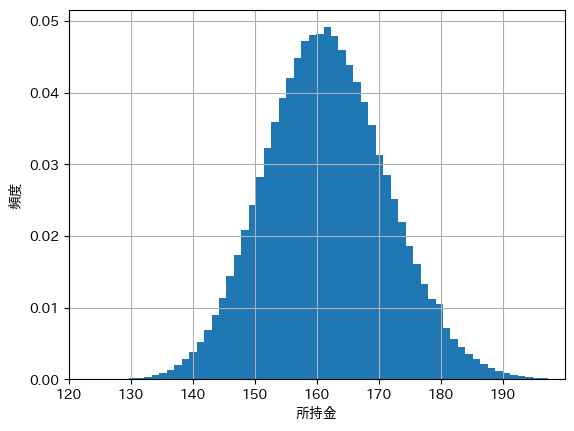

期待値は 161.6452612455452 です。
元手を上回る確率は 99.99999999999926 ％ です。


In [117]:
n = 10 # ステップを繰り返す回数

d = {100:1}
for i in range(n):
    d = bunkatsu(d, 500)
    d = rearrange(d, 0.2)
    print(f'step{i+1} ', end='')
    
display(d, 100, 1025, [120, 200], [120, 200, 10])

これでようやく我々は理想の戦略を見つけたことになる。この「分割＆全賭け」戦略では、
* 借金せず、
* 元手を確実に上回り、
* 100 円の元手を高い確率で 160 円 ± 20 円にできる。

しかも、ステップ回数 $ n $ を増やせば所持金はいくらでも高くすることができ、
分割数 $ m $ を増やせばばらつきをいくらでも小さくすることができる！

----

この「分割＆全賭け」戦略を現実に応用して、安全に大儲けをすることはできるだろうか？　そして三十歳でリタイアし、余生を趣味と旅行に費やす夢の生活を送ることは可能だろうか？　その答えは、ある意味イエスであり、ノーでもある。

まずノーの方のココロから説明しよう。そもそも、このような虫のよい賭けなど現実にはない。以下の条件をすべて同時に満たすような賭けはあり得ないと言ってよいだろう。
* 期待値がプラス
* 即座に結果が得られる
* 短時間に大量の賭けをおこなえる、何度でも繰り返せる
* セットに含まれる賭けがすべて独立（互いに関係なくバラバラの結果を出す）
* 胴元が信頼できる

また逆に考えれば、もしこのような賭けがあったとすれば、世界中の資金が一気に押し寄せて、賭けの胴元はあっという間に破産してしまうだろう。

だがその一方で、この「分割＆全賭け」という戦略が現実においてまったく行われていないとも言い切れないのだ。投資の世界では、回数を増やして分布のばらつきを小さくする手法は「分散投資」と呼ばれ、よく知られている。多くの株式の平均から計算したインデックスに比例するようなファンド商品は多くあり、これに投資することは、ある意味では「分割＆全賭け」戦略の「分割」の部分に相当する。

そしてこのインデックス・ファンドに長く投資を続けることは、これに「全賭け」をしながら繰り返すことに相当する。つまり、なんのことはない、世間でよく行われているインデックス・ファンドへの長期投資は、「分割＆全賭け」戦略を実践する投資方法だと言えるのだ。

だが、そう考えてみると逆に、ここで考えてきた理想的な「賭け」と、インデックス・ファンドのような現実の「賭け」との違いが際立ってくる。

現実の投資においては、
* それぞれの「賭け」はとても互いに独立とは言えない。コロナが流行したり、アメリカの大統領が変な政策をぶちあげたりするたびに、多くの資産は**同時に**値を下げてしまう。一つ一つの賭けが「独立」でなければ、いくら分割してもばらつきは抑えることができない
* 短い時間に大量の回数を繰り返せせない。大抵の投資対象で期待できる利率は**年に**数パーセントというところであり、このたった数パーセントの利益を見込める「賭け」を 10 回繰り返すだけで 10 年かかってしまう。
* 現実の投資商品では、投資できる最低額が決まっており、株式だとそれは数万円から数十万円である。

このように、勝てばかならず元本の数パーセントが得られ、少額でも賭けることができ、信頼でき、何度でも繰り返せるような賭けは、現実にはまずないと言っていいだろう。

だが、いままで我々がここで考えてきたことは決して無駄にはならないだろう。以下のような教訓は、現実においても危険をさけ、安全な投資を行うために必要な、基礎的な知識と感覚を与えてくれるに違いない。
* 同額の賭けを繰り返して足し合わせることによって、運のばらつきは抑えられる。
* いくら期待値がプラスであっても「全賭け」のような戦略を取れば、ほぼ確実に金を失う「宝くじ」状態に陥ってしまう。